# Sprint 9 ニューラルネットワーク

# ライブラリのimport

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

### 《MNISTとは？》


画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには訓練用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかというラベルが含まれています。


### 《画像データとは？》


デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。



# データの準備

In [2]:
# 読み込み
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
# データの確認
print("訓練データ全体",X_train.shape) 
print("テストデータ全体",X_test.shape) 
print("訓練データの1つのデータ",X_train[0].shape)
print("訓練データの1つのデータの型",X_train[0].dtype) 

訓練データ全体 (60000, 28, 28)
テストデータ全体 (10000, 28, 28)
訓練データの1つのデータ (28, 28)
訓練データの1つのデータの型 uint8


###### 各データは28×28ピクセルの白黒画像です。

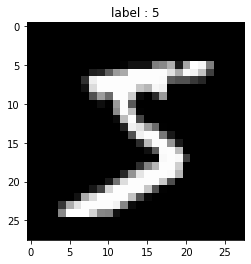

In [4]:
# 描画   画像データを可視化します。plt.imshowに渡します。
index = 0 #index = 0の時はlabel 5↓
image = X_train[index] #label 5にする
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index])) #label 5にする
plt.show()

《発展的話題》


画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどとまったく同じ風に表示されます。

#### 平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。すべてのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現します。
《補足》


ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

In [5]:
# 2次元→1次元（画像データ→行データ）
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
# データの確認
print("訓練データ全体",X_train.shape) #1行にしたことで28×28が784になる
print("テストデータ全体",X_test.shape) 
print("訓練データの1つのデータ",X_train[0].shape)
print("訓練データの1つのデータの型",X_train[0].dtype) 

訓練データ全体 (60000, 784)
テストデータ全体 (10000, 784)
訓練データの1つのデータ (784,)
訓練データの1つのデータの型 uint8


### 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [7]:
# NNの入力値にするため、0-1に収めてやる
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255 #ピクセル最大値255
X_test /= 255
print(X_train.max()) 
print(X_train.min())

1.0


<ipython-input-7-ee3951420149>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = X_train.astype(np.float)
<ipython-input-7-ee3951420149>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = X_test.astype(np.float)


0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には one-hot表現 に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。


In [8]:
# 訓練データとテストデータに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
# one-hotベクトル化  0～9の値、３の場合、0 0 0 1 0 0 0 0 0 0 0 みたいな処理

#list：リストのリスト。i列目に含まれる値がcategories[i]に含まれていない場合の挙動は、handle_unknownの設定次第。
#デフォルト値は'error'。'error'：※1のケースにて、処理が異常終了する。
#'ignore'：※1のケースにて、categories[i]に含まれていないカテゴリ値を無視する。
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis]) # add

print("訓練データ 目的変数",y_train_one_hot.shape) 
print("テストデータ 目的変数",y_test_one_hot.shape) 
print("評価データ 目的変数",y_val_one_hot.shape)  # add

訓練データ 目的変数 (48000, 10)
テストデータ 目的変数 (10000, 10)
評価データ 目的変数 (12000, 10)


# ミニバッチクラス

イテレータというもので実現しますので、まずは、iterの基本動作を見ていきます。

## イテレータの基本

In [10]:
class SampleIterator:
    def __init__(self, num):
        """通常のコンストラクタと同様の働き
        """
        # 最大呼び出し回数
        self.num = num

    def __iter__(self):
        """
        呼び出される際は、まずここが呼ばれる
        return self 部分は、このインスタンス自身を返している
        """
        # 現在位置
        self.current = 0
        return self

    def __next__(self):
        """基本的にここに返してやりたい処理を書く
        """
        # 現在位置が最大呼び出し回数に達したかの判定
        if self.current == self.num:
            raise StopIteration()
        
        # 返してやりたい値
        value = self.current
        
        # 現在位置を進める
        self.current += 1
        
        return value

In [11]:
sample_iter = SampleIterator(3)
for i in sample_iter:
    print(i)

0
1
2


## ミニバッチイテレータ

NNの学習の際、このクラスを呼び出すだけで、データを生成してくれるようにする

#### ミニバッチ処理
これまでの機械学習スクラッチでは、すべてのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する 確率的勾配降下法 が一般的です。分割した際のひとかたまりを ミニバッチ 、そのサンプル数を バッチサイズ と呼びます。


今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 イテレーション（iteration） すると呼びます。訓練データを一度すべて見ると1回の エポック（epoch） が終わったことになります。このエポックを複数回繰り返し、学習が完了します。


これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

###### 雛形にある「__getitem__」メソッドの必要性の話ですが、問題文のサンプルコードにあった「get_mini_batch[5]」のようにインスタンス名の後ろにインデックスを付けてバッチデータを取得する場合にはこのメソッドが無いとエラーになるようです。
（このような使い方をしなければ上記のメソッドは不要です）


In [12]:
class GetMiniBatch:

    def __init__(self, X, y, batch_size = 20, seed=0):
        """通常のコンストラクタと同様の働き
        Parameters
        ----------
        X : 説明変数（画像の1次元データ）
        y : 目的変数（ラベル）
        batch_size : 必要なミニバッチのデータ数
        seed : ランダムシード固定
        """
        # ランダムシードの固定（学習ごとに同じ生成順）
        np.random.seed(seed)
        # バッチ数のメンバ変数
        self.batch_size = batch_size
        # データ全体の長さ分のインデックスをランダムに並べ替え
        # np.random.permutation:配列をランダムに並べ替え
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))# permutation 並べ替え、配列 変形     
        # 並べ替えたインデックスと同じ順番で説明変数と目的変数を並べ替え
        self._X = X[shuffle_index]                                       
        self._y = y[shuffle_index]                                       
        # データ数をバッチ数で割って、何回呼び出せば、全データを学習したことになるかの判定
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int) # np.ceil 少数点切り上げ  

    def __len__(self): # 雛形の__getitem__があるときは__len__が必要、無い時はなくても良い
        return self._stop
    
    def __iter__(self):
        # 何回目の呼び出しか
        self._counter = 0
        return self

    def __next__(self):
        # 全データを学習すればストップ
        if self._counter >= self._stop:
            raise StopIteration()
        # 並び変えた_X,_yの何番目のインデックスを採用するか
        p0 = self._counter*self.batch_size 
        p1 = self._counter*self.batch_size + self.batch_size
        # returnする前にカウンタに+1しておく
        self._counter += 1
        # 説明変数と目的変数を返す  あるindexからindexまでのXとyを返す
        return self._X[p0:p1], self._y[p0:p1] #self._Xのp0～p1まで,self._yのp0～p1までの値を返す

# NNクラスの作成

In [13]:
class ScratchSimpleNeuralNetrowkClassifier():

    def __init__(self,batch_size = 20,n_features = 784,n_nodes1 = 400,n_nodes2 = 200,n_output = 10,sigma = 0.02,lr = 0.01,epoch = 10, verbose=True):
        """学習に必要なメンバ変数の初期化
        Parameters
        ----------
        verbose : 計算過程を出力するか否か
        batch_size : ミニバッチのデータ数
        n_features : 説明変数の数
        n_nodes1 : 1層目のノードの数
        n_nodes2 : 2層目のノードの数
        n_output : 出力層のノードの数
        sigma : 重みの初期化の際のガウス分布の標準偏差
        lr : 学習率
        epoch : 学習回数
        """
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2 
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        # 損失記録用
        self.loss_train = []
        self.loss_val = [] # change
        # 使用する重みの初期化
        #numpy.random.randnは平均0、標準偏差1の正規分布（ガウス分布とも言う）の乱数を生成する関数。
        #正規分布とは、均値付近にデータが集積するような確率分布のこと、イメージは偏差値図。
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1) 
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
        self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
        self.B3 = self.sigma * np.random.randn(1, self.n_output)
    
    def fit(self, X, y, X_val=None, y_val=None): # change
        """学習
        Parameters
        ----------
        X : 説明変数
        y : 目的変数
        X_val : 説明変数 # change
        y_val : 目的変数 # change
        
        Overview
        ----------
        学習回数分学習を繰り返すが、各学習の中でもミニバッチで全データ学習させている。
        イメージとしては、下記
        学習0回目
        　ミニバッチ学習0回目→ミニバッチ学習1回目→・・・
        学習1回目
        　ミニバッチ学習0回目→ミニバッチ学習1回目→・・・
        ・・・・
        """
        # 学習回数分ループ
        for _ in range(self.epoch): #epoch ミニバッチ学習において訓練データを全て使い切った時の回数＝１epoch
            
            # 先ほど定義したミニバッチイテレータのインスタンス化
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            
            # ミニバッチイテレータが停止するまでバッチ学習
            # get_mini_batchを呼び出すたびに、説明変数と目的変数が返ってくる
            for mini_X_train, mini_y_train in get_mini_batch: # GetMiniBatchの返り値のreturn self._X[p0:p1], self._y[p0:p1]がmini_X_train, mini_y_train
                # 順伝播
                self.forward(mini_X_train)
                # 逆伝播
                self.backward(mini_X_train, mini_y_train)
                
            # ミニバッチ学習後のロス計算
            self.forward(X)
            self.loss_train.append(self.cross_entropy_error(y, self.Z3))
            # 評価データがあるなら、こちらも計算
            if X_val is not None:
                self.forward(X_val)
                self.loss_val.append(self.cross_entropy_error(y_val, self.Z3))
        
        # 学習過程の出力
        if self.verbose:
            if X_val is None: # change
                print(self.loss_train)
            else:
                print(self.loss_train,self.loss_val) # change
    
    def forward(self, X):
        """順伝播
        Parameters
        ----------
        X : 説明変数
        """
        ## 1層目
        # 活性化関数に通す前
        self.A1 = X @ self.W1 + self.B1
        # 上記を活性化関数に通す
        self.Z1 = self.tanh_function(self.A1)
        
        ## 2層目
        # 活性化関数に通す前
        self.A2 = self.Z1 @ self.W2 + self.B2
        # 上記を活性化関数に通す
        self.Z2 = self.tanh_function(self.A2)
        
        ## 3層目（出力層）
        # 活性化関数に通す前
        self.A3 = self.Z2 @ self.W3 + self.B3
        # 上記を活性化関数に通す
        self.Z3 = self.softmax(self.A3)
        
        # メンバ変数self.Z3がNNの出力となる
    
    def backward(self, X, y):
        """逆伝播
        Parameters
        ----------
        X : 説明変数
        """
        ## 3層目（出力層）
        # 3層目の重みに対する勾配
        dA3 = (self.Z3 - y)/self.batch_size # change
        dW3 = self.Z2.T @ dA3
        # 3層目のバイアス項に対する勾配
        dB3 = np.sum(dA3, axis=0)
        
        ## 2層目
        # 2層目の重みに対する勾配
        dZ2 = dA3 @ self.W3.T
        dA2 = dZ2 * (1 - self.tanh_function(self.A2)**2)
        dW2 = self.Z1.T @ dA2
        # 2層目のバイアス項に対する勾配
        dB2 = np.sum(dA2, axis=0)
        
        ## 1層目
        # 1層目の重みに対する勾配
        dZ1 = dA2 @ self.W2.T
        dA1 = dZ1 * (1 - self.tanh_function(self.A1)**2)
        dW1 = X.T @ dA1
        # 1層目のバイアス項に対する勾配
        dB1 = np.sum(dA1, axis=0)
        
        # 各勾配に学習率を掛けて更新
        self.W3 -= self.lr * dW3
        self.B3 -= self.lr * dB3
        self.W2 -= self.lr * dW2
        self.B2 -= self.lr * dB2
        self.W1 -= self.lr * dW1
        self.B1 -= self.lr * dB1
            
    def tanh_function(self, A):
        """活性化関数tanh
        Parameters
        ----------
        A : 何かしらの配列
        """
        return np.tanh(A)
    
    def softmax(self, A):
        """活性化関数softmax
        Parameters
        ----------
        A : 何かしらの配列
        """
        return np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)　#要確認

    def cross_entropy_error(self, y, Z):
        """損失関数　クロスエントロピー誤差
        Parameters
        ----------
        y : 正解データ
        Z : 予測値
        """
        L = - np.sum(y * np.log(Z)) / len(y)
        return L
        
    def predict(self, X):
        """予測
        Parameters
        ----------
        X : 説明変数
        """
        # 順伝播処理
        self.forward(X)
        # 最も大きいインデックスをクラスとして採用
        return np.argmax(self.Z3, axis=1)

# 問題6

In [14]:
# インスタンス化
nn = ScratchSimpleNeuralNetrowkClassifier(epoch=10)
# 学習
nn.fit(X_train[:10000],y_train_one_hot[:10000], X_val, y_val_one_hot)  # change

<ipython-input-12-8c4c8b883f5a>:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)


[1.7419353646820688, 0.828948554629384, 0.5732824425786629, 0.46760970253942524, 0.41006271717101445, 0.3746768460175002, 0.3503551610710581, 0.3319576645365413, 0.31707527895339266, 0.3045045649795038] [1.739762957808141, 0.8335909457915762, 0.5832711100686268, 0.4812439451134604, 0.42775410648522894, 0.3963576288437956, 0.37581307608941417, 0.3610212043475457, 0.3496134239765543, 0.340406968597599]


In [15]:
# 予測
pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)

In [16]:
# 正解率
accuracy_score(y_train, pred_train),accuracy_score(y_test, pred_test)

(0.9060416666666666, 0.9066)

# 問題7

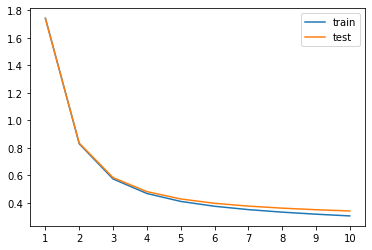

In [17]:
plt.plot(list(range(1, nn.epoch+1)), nn.loss_train, label='train') 
plt.plot(list(range(1, nn.epoch+1)), nn.loss_val, label='test') # change
plt.legend()
plt.xticks(list(range(1, nn.epoch+1)));